Since it is just PCA 5D, we will not do PHATE.   
We will run MIOFlow on the 5D PCA data.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scprep
import phate
import sys
sys.path.append('../src')
from dimchanger import DimChanger
import hickle as hkl

In [32]:
data_path = '../data_in_vivo'
data_ptl = np.load(f'{data_path}/primary_csc_to_lung_noncsc.npz')
data_ptp = np.load(f'{data_path}/primary_csc_to_primary_noncsc.npz')
data_combined = np.load(f'{data_path}/combined_pc_2_timepoints.npz')
data_combined2 = np.load('/home/av622/all_aanet/aanet_results/reproduce_tnet_figure/combined_pc_2_timepoints.npz')

In [4]:
data_ptl['sample_labels']

array([0, 0, 0, ..., 2, 2, 2])

In [34]:
data_combined2['pca'].shape

(131062, 20)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()
/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Axes3D: >

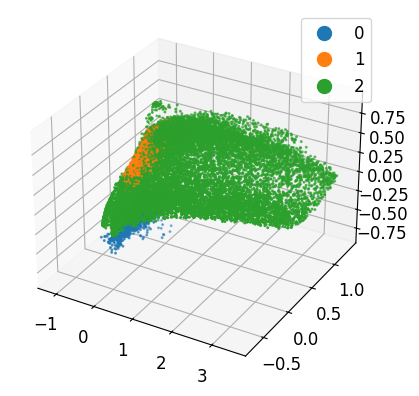

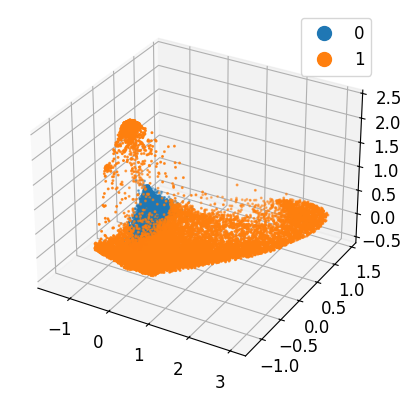

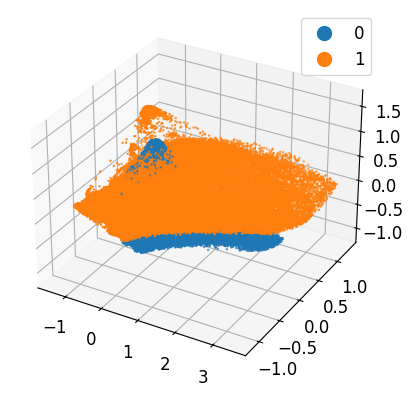

In [8]:
scprep.plot.scatter3d(data_ptl['pca'], c=data_ptl['sample_labels'])
scprep.plot.scatter3d(data_ptp['pca'], c=data_ptp['sample_labels'])
scprep.plot.scatter3d(data_combined['pca'], c=data_combined['sample_labels'])

In [12]:
pc_op = hkl.load('/home/av622/all_aanet/aanet_results/reproduce_tnet_figure/tnet_combined_pc_op.hkl')
scaler = 12.893932987398726 # scaled before trajectorynet

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
import hickle
import sklearn
from sklearn.decomposition import PCA
import warnings

# Load the PCA model directly
old_pca = hickle.load('/home/av622/all_aanet/aanet_results/reproduce_tnet_figure/tnet_combined_pc_op.hkl')

# Extract the necessary parameters from the old model
n_components = old_pca.n_components

# Create a new PCA model with the current scikit-learn version
new_pca = PCA(n_components=n_components)

# Copy attributes with error handling
attributes_to_copy = [
    'components_', 
    'explained_variance_', 
    'explained_variance_ratio_', 
    'singular_values_', 
    'mean_', 
    'n_components_'
]

# Try to handle the n_features attribute change
if hasattr(old_pca, 'n_features_in_'):
    new_pca.n_features_in_ = old_pca.n_features_in_
elif hasattr(old_pca, 'n_features_'):
    # In newer versions, n_features_in_ is used instead of n_features_
    new_pca.n_features_in_ = old_pca.n_features_

# Copy the rest of the attributes
for attr in attributes_to_copy:
    if hasattr(old_pca, attr):
        try:
            setattr(new_pca, attr, getattr(old_pca, attr))
        except Exception as e:
            warnings.warn(f"Could not copy attribute {attr}: {e}")

# Save the updated model
hickle.dump(new_pca, f'{data_path}/tnet_combined_pc_op_updated.hkl')

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/hickle/lookup.py:1491: SerializedWarning: 'PCA' type not understood, data is serialized:
  warnings.warn(


In [18]:
pc_op = hickle.load(f'{data_path}/tnet_combined_pc_op_updated.hkl')

In [19]:
pc_op

PCA(n_components=5)

In [20]:
var_ratio = pc_op.explained_variance_ratio_


In [35]:
combined_gene_sp = pc_op.inverse_transform(data_combined['pca'][:,:5])

In [36]:
combined_gene_sp.shape

(131062, 20092)

In [25]:
data_combined['pca'].shape

(131062, 20)

(5, 20092)